In [1]:
import warnings;warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
import torch

In [2]:
import pandas as pd

In [3]:
from pathlib import Path

In [4]:
path = Path('C:/Users/sappusamy/Documents/SriWK/mnist/train.csv')

In [5]:
dataset = pd.read_csv(path)

In [6]:
y = dataset.label.to_numpy()

In [7]:
y.shape

(42000,)

In [8]:
x = dataset.iloc[:,1:].to_numpy()

In [9]:
x.shape

(42000, 784)

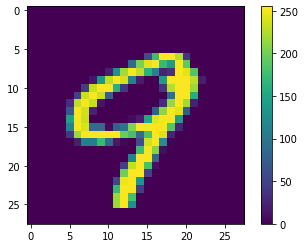

9


In [10]:
index_num = 100

plt.figure()
plt.imshow(x[index_num].reshape(28,28))
plt.colorbar()
plt.grid(False)
plt.show()
print(y[index_num])

In [11]:
class NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(784,50)
        self.tanh = nn.Tanh()
        self.l2 = nn.Linear(50,10)
        
    def forward(self,x):
        x = self.l1(x)
        x = self.tanh(x)
        x = self.l2(x)
        return x

In [12]:
model = NN()

In [13]:
crit = nn.CrossEntropyLoss()

In [14]:
preds = model(torch.FloatTensor(x))

In [15]:
crit(preds,torch.LongTensor(y))

tensor(2.3517, grad_fn=<NllLossBackward>)

In [16]:
optimizer = optim.SGD(model.parameters(),lr=0.01)

In [17]:
loss=0
for _ in range(1):
    total_loss=0.0
    itr = 0
    for i in range(0,len(x),256):
        itr+=1
        xb = torch.FloatTensor(x[i:i+256])
        yb = torch.LongTensor(y[i:i+256])
        preds = model(xb)
        loss = crit(preds,yb)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        total_loss+=loss.item()
    print(total_loss/itr)

1.6593514709761648


In [18]:
loss

tensor(1.2617, grad_fn=<NllLossBackward>)

In [19]:
test = pd.read_csv('C:/Users/sappusamy/Documents/SriWK/mnist/test.csv')

In [20]:
x_test = test.to_numpy()

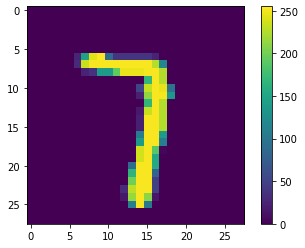

In [21]:
index_num = 9012

plt.figure()
plt.imshow(x_test[index_num].reshape(28,28))
plt.colorbar()
plt.grid(False)
plt.show()


In [22]:
nn.functional.softmax(model(torch.FloatTensor(x_test[index_num]))).argmax()

tensor(7)